-#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#Data Description:
#Murder -- Muder rates in different places of United States
#Assualt- Assualt rate in different places of United States
#UrbanPop - urban population in different places of United States
#Rape - Rape rate in different places of United States

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [135]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
clust         0
dtype: int64

In [137]:
data.describe()

,Murder,Assault,UrbanPop,Rape,clust
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,1.400000
std,4.35551,83.337661,14.474763,9.366385,1.195229
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000
50%,7.25000,159.000000,66.000000,20.100000,1.500000
75%,11.25000,249.000000,77.750000,26.175000,2.000000
max,17.40000,337.000000,91.000000,46.000000,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
transformation=MinMaxScaler()
data_new=pd.DataFrame(transformation.fit_transform(data.iloc[:,1:]))
data_new



,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# creating dendrogram

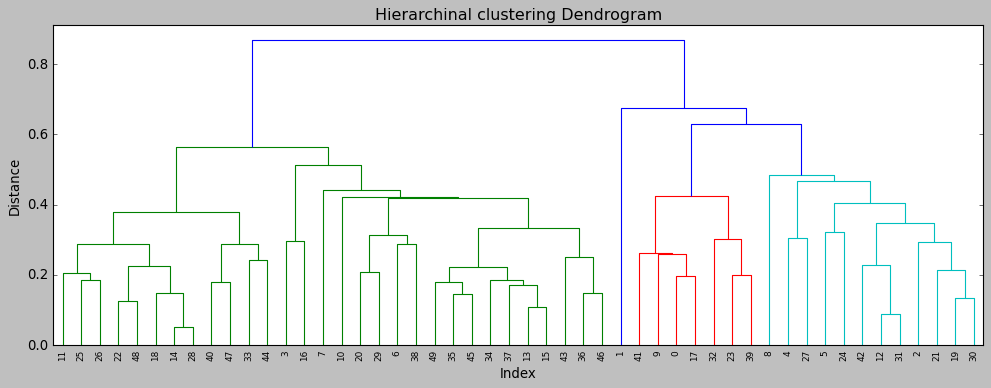

In [69]:
from scipy.cluster.hierarchy import linkage # importing linkages 
import scipy.cluster.hierarchy as sch
z=linkage(data_new,method="average",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("Hierarchinal clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()


# cutting the dendrogram into clusters

In [70]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
H_complete=AgglomerativeClustering(n_clusters=4, linkage="average",affinity="euclidean").fit(data_new)
cluster_labels=pd.Series(H_complete.labels_)
cluster_labels
data['clust']=cluster_labels
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


# groupby 

In [71]:
data.iloc[:,1:].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [72]:
data0=data[(data.clust==0)]
data0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [73]:
data1=data[(data.clust==1)]
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [74]:
data2=data[(data.clust==2)]
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [75]:
data3=data[(data.clust==3)]
data3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [104]:
import sklearn
sklearn.metrics.silhouette_score(data_new,H_complete.labels_)

0.36992391140277175

# applying KMean clustering

-1st we need to find out the k value 
-using elbow curve will find out 
-within cluster sum of sqaure

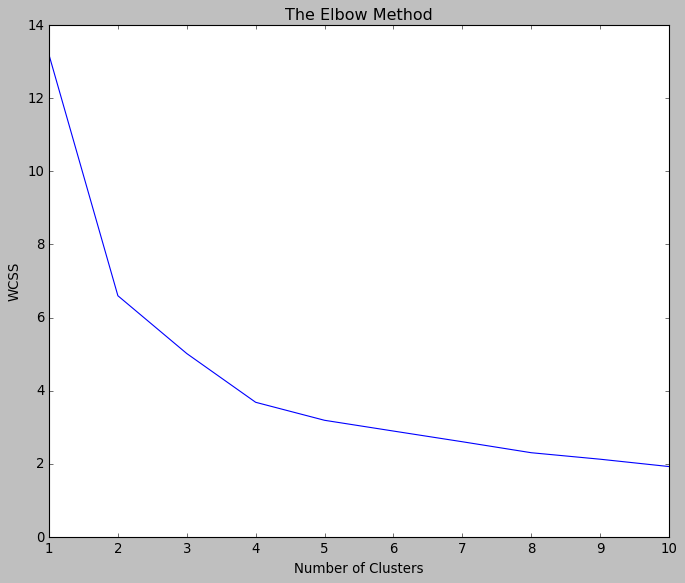

In [76]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_new)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [77]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data_new)  

In [78]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [79]:
y_kmeans 

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [80]:
clf.cluster_centers_ 

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [81]:
clf.inertia_

3.683456153585913

In [82]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
data['clust']=md # creating a  new column and assigning it to new column 
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [83]:
data.iloc[:,1:].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.852941,141.176471,73.647059,19.335294,0.0
1,13.937500,243.625000,53.750000,21.412500,1.0
2,3.600000,78.538462,52.076923,12.176923,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0


In [84]:
# to know the styles 
plt.style.use(['classic']) 
print(plt.style.available)   

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

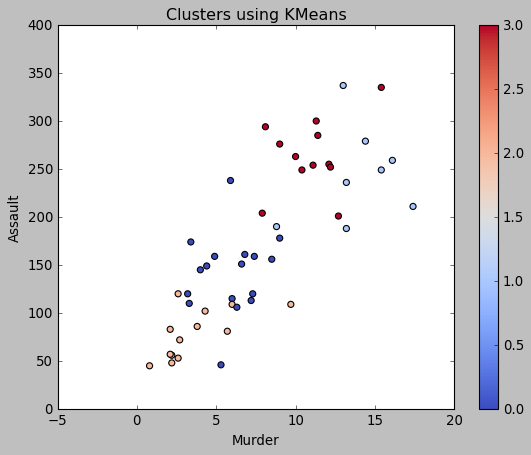

In [85]:
data.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')  

In [86]:
WCSS

[13.184122550256443,
 6.5968938679461955,
 5.016388924690672,
 3.683456153585913,
 3.1911357068589448,
 2.8968659794209803,
 2.604641891355278,
 2.3047071433088004,
 2.127080734118889,
 1.9263222955567931]

In [102]:
import sklearn
sklearn.metrics.silhouette_score(data_new,y_kmeans)

0.34089035600743633

# DBSCAN

In [87]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [88]:
neighbors=NearestNeighbors(n_neighbors=8)
nbrs=neighbors.fit(data_new)
distances, indices=nbrs.kneighbors(data_new)

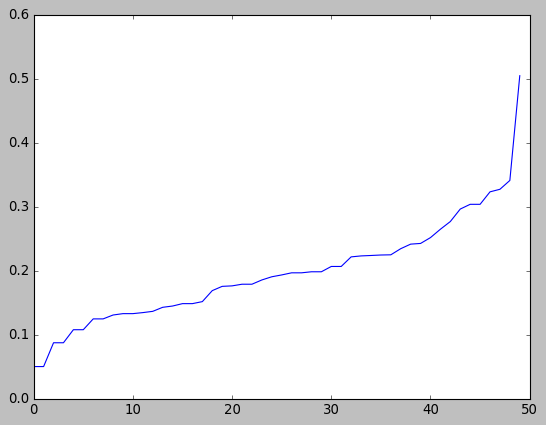

In [89]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [125]:
dbscan=DBSCAN(eps=0.315, min_samples=5)
dbscan.fit(data_new)

DBSCAN(eps=0.315)

In [126]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2,  1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [127]:
c1=pd.DataFrame(dbscan.labels_,columns=['clusters'])


In [128]:
c1
pd.set_option("display.max_rows",None)


In [129]:
c1

,clusters
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,0


In [130]:
df1=pd.concat([data,c1],axis=1)

In [131]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusters
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,-1
5,Colorado,7.9,204,78,38.7,3,-1
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,3,-1
9,Georgia,17.4,211,60,25.8,1,0


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

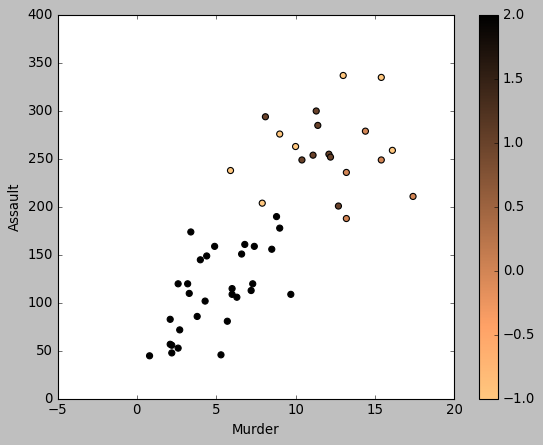

In [132]:
#visualize the clusters
df1.plot(x="Murder",y="Assault",c=dbscan.labels_,s=30,kind="scatter",cmap=plt.cm.copper_r)

In [133]:
d1=dbscan.labels_

In [134]:
import sklearn
sklearn.metrics.silhouette_score(data_new,d1)

0.26689876808666485